<h1 style="text-align: center; float: center; top: 10px;left: 10px; "><code>geosnap</code></h1>
<img style="float: center; width: 200px;" src="../doc/geosnap.png" alt="geosnap"/>

<h2 style="text-align: center;">The GeoSpatial Neighborhood Analysis Package</h2>
<hr>

[![Build Status](https://travis-ci.com/spatialucr/geosnap.svg?branch=master)](https://travis-ci.com/spatialucr/geosnap)
[![Coverage Status](https://coveralls.io/repos/github/spatialucr/geosnap/badge.svg?branch=master)](https://coveralls.io/github/spatialucr/geosnap?branch=master&service=github)

`geosnap` makes it easier to explore, model, analyze, and visualize the social and spatial dynamics
of neighborhoods.
Neighborhoods are important for a wide variety of reasons, but they’re hard to study
because of some long-standing challenges, including that

- there is no formal definition of a
  [“neighborhood”](https://www.cnu.org/publicsquare/2019/01/29/once-and-future-neighborhood) so
  identifying and modeling them is frought with uncertainty
- many different physical and social data can characterize a neighborhood (e.g. its
  proximity to the urban core, its share of residents with a high school education, or the
  median price of its apartments) so there are countless ways to model neighborhoods by
  choosing different subsets of attributes
- conceptually, neighborhoods evolve through both space and time, meaning their
  socially-construed boundaries can shift over time, as can their demographic makeup.
- geographic tabulation units change boundaries over time, meaning the raw data are
  aggregated to different areal units at differerent points in time.

To address these challenges,`geosnap` provides a suite of tools for creating socio-spatial
datasets, harmonizing those datasets into consistent set of time-static boundaries,
modeling bespoke neighborhoods and prototypical neighborhood types, and modeling
neighborhood change using classic and spatial statistical methods.
It also provides a set of static and interactive visualization tools to help you display
and understand the critical information at each step of the process.

<span style="font-size:1.2em; font-weight: bold">Batteries Included:</span>
`geosnap` comes packed with 30 years of census data, thanks to [quilt](https://quiltdata.com/), so you
can get started modeling neighborhoods in the U.S. immediately.
But you’re not just limited to the data provided with the package. `geosnap`
works with any data you provide, any place in the world.

<img src='../doc/figs/Washington-Arlington-Alexandria_DC-VA-MD-WV.gif' alt='DC Transitions' width='750'/>

## Quickstart

**See the [example notebooks](https://github.com/spatialucr/geosnap/tree/master/examples) for a
gentle introduction to `geosnap`'s major functionality**

the `Community` class is geosnap’s central data construct that holds space-time neighborhood data.
You can create a `Community` from geosnap’s built-in data by passing a set of fips codes to a
constructor method


In [1]:
from geosnap.data import Community
dc = Community.from_census(state_fips='11')

/Users/knaaptime/anaconda3/envs/geosnap/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/Users/knaaptime/anaconda3/envs/geosnap/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


Using the `.from_census` constructor, you'll get 30 years of census tract data in their original boundaries with over a hundred commonly used demographic and socioeconomic variables. Data are stored as a long-form geodataframe under the `gdf` attribute

In [2]:
dc.gdf.head()

,geoid,geometry,median_contract_rent,median_home_value,median_household_income,median_income_asianhh,median_income_blackhh,median_income_hispanichh,median_income_whitehh,n_age_5_older,...,p_unemployment_rate,p_vacant_housing_units,p_veterans,p_vietnamese_persons,p_white_over_60,p_white_over_65,p_white_under_15,p_widowed_divorced,per_capita_income,year
53214,11001001600,POLYGON ((-77.02680206298828 38.98410034179688...,477.0,285100.0,75252.0,NaN,NaN,NaN,NaN,4.742191e+70,...,0.0,2.58,1.028308e+08,0.00,3.159920e+25,4.999423e+17,1.378187e+24,0.0,32166.0,1990
53215,11001001500,POLYGON ((-77.05280303955078 38.98649978637695...,1001.0,366000.0,79681.0,NaN,NaN,NaN,NaN,1.025723e+72,...,0.0,3.38,7.095389e+07,0.23,6.529311e+30,1.483617e+23,6.816417e+33,0.0,36452.0,1990
53216,11001001701,POLYGON ((-77.02660369873047 38.97769927978516...,429.0,135600.0,34420.0,NaN,NaN,NaN,NaN,6.918716e+64,...,0.0,3.89,8.990532e+05,0.10,1.184601e+14,1.285720e+10,8.476736e+15,0.0,17782.0,1990
53217,11001001801,POLYGON ((-77.02660369873047 38.97769927978516...,1001.0,0.0,77197.0,NaN,NaN,NaN,NaN,3.084115e+31,...,0.0,10.00,5.229000e+01,0.00,1.450982e+11,1.437909e+08,1.321830e+14,0.0,14679.0,1990
53218,11001001702,POLYGON ((-77.00859832763672 38.97000122070312...,514.0,129300.0,42661.0,NaN,NaN,NaN,NaN,4.210494e+62,...,0.0,3.96,7.219278e+04,0.04,4.438992e+13,2.147213e+10,2.352939e+17,0.0,20468.0,1990


you can create a [geodemographic typology](https://en.wikipedia.org/wiki/Geodemography) using classic clustering methods on the `Community`

In [3]:
dc.cluster(method='kmeans', n_clusters=6, columns=['p_unemployment_rate', 'per_capita_income'] )

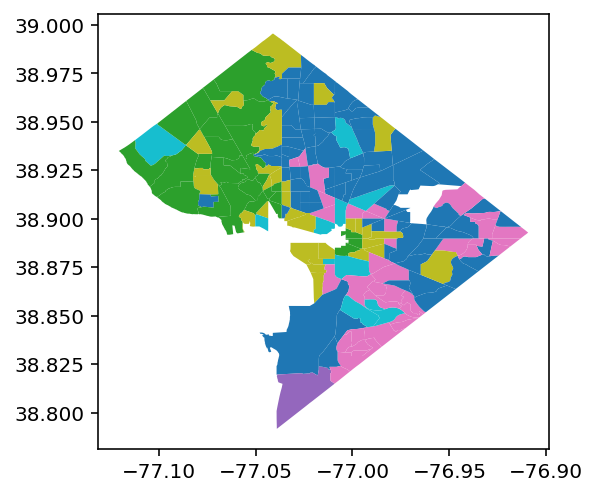

In [4]:
dc.gdf[dc.gdf.year==2000].plot(column='kmeans')

you can create a [regionalization](https://www.sciencedirect.com/science/article/pii/0038012181900409) using spatially-constrained clustering methods on the `Community`

In [5]:
dc.cluster_spatial(method='spenc', n_clusters=6, columns=['p_unemployment_rate', 'per_capita_income'] )

/Users/knaaptime/anaconda3/envs/geosnap/lib/python3.7/site-packages/libpysal/weights/weights.py:170: UserWarning:

The weights matrix is not fully connected. There are 47 components

/Users/knaaptime/anaconda3/envs/geosnap/lib/python3.7/site-packages/libpysal/weights/weights.py:170: UserWarning:

The weights matrix is not fully connected. There are 46 components



There are no disconnected observations (no islands)!
There are no disconnected observations (no islands)!
There are no disconnected observations (no islands)!


/Users/knaaptime/anaconda3/envs/geosnap/lib/python3.7/site-packages/libpysal/weights/weights.py:170: UserWarning:

The weights matrix is not fully connected. There are 44 components



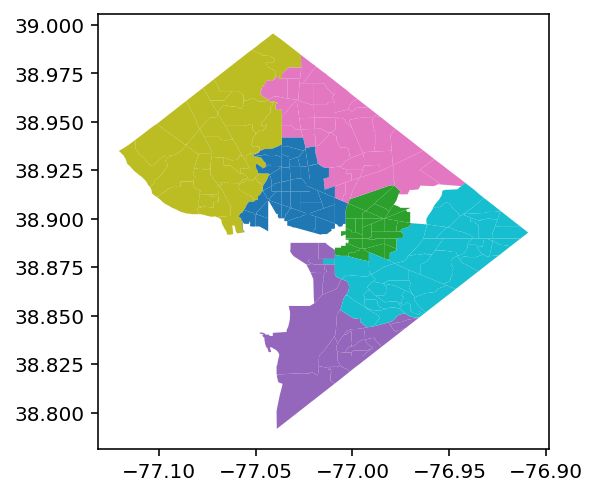

In [6]:
dc.gdf[dc.gdf.year==2000].plot('spenc')

You can also [harmonize](https://github.com/spatialucr/tobler) `Community` boundaries so that they're consistent over time

   **coming soon!**

## Architecture


#### `geosnap` is comprised of four modules:

##### `data`

Ingest, create, and manipulate space-time datasets

##### `analyze`

Analyze and model neighborhood dynamics

##### `harmonize`

Harmonize neighborhood boundaries into consistent, stable units using spatial statistical
methods

##### `visualize`

Visualize neighborhood dynamics

*You can learn more about the functionality in each module by browsing the [example notebooks](https://github.com/spatialucr/geosnap/tree/master/examples)*


## Installation
The recommended method for installing geosnap is with
[anaconda](https://www.anaconda.com/download/). To get started with the development version,
clone this repository or download it manually then `cd` into the directory and run the
following commands:

```bash
conda env create -f environment.yml
conda activate geosnap 
python setup.py develop
```

This will download the appropriate dependencies and install geosnap in its own conda
environment.

## Development

geosnap development is hosted on [github](https://github.com/spatialucr/geosnap)

## Bug reports

To search for or report bugs, please see geosnap’s
[issues](http://github.com/spatialucr/geosnap/issues)

## License information

See the file “LICENSE.txt” for information on the history of this software, terms &
conditions for usage, and a DISCLAIMER OF ALL WARRANTIES.

## Funding

<img src="../doc/nsf_logo.jpg" width=100 /> This project is supported by NSF Award #1733705,
[Neighborhoods in Space-Time Contexts](https://www.nsf.gov/awardsearch/showAward?AWD_ID=1733705&HistoricalAwards=false)
